### Titanic - Machine Learning from Disaster

#### Author: Thilagavathy R Vasantharaja

### 1.Importing necessary Libraries

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.load train and test Data

In [168]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### 3.Analyse Data

In [169]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
train_data.shape

(891, 12)

In [172]:
test_data.shape

(418, 11)

In [173]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 4.Data Cleaning/Preprocessing

In [175]:
train_data.drop('Cabin',axis=1,inplace=True)

In [176]:
test_data.drop('Cabin',axis=1,inplace=True)

In [177]:
median_age=train_data['Age'].median()
train_data['Age'].replace(np.nan,median_age,inplace=True)

In [178]:
median_age=test_data['Age'].median()
test_data['Age'].replace(np.nan,median_age,inplace=True)

In [179]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [180]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [181]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### 5.Plotting in chart

<AxesSubplot:xlabel='Survived', ylabel='count'>

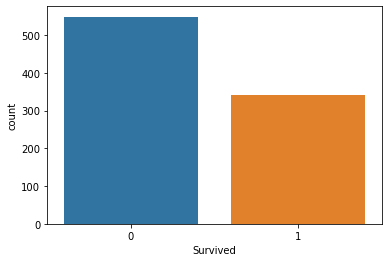

In [182]:
sns.countplot(x='Survived',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

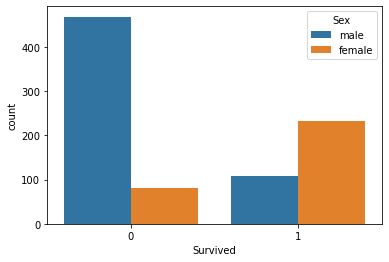

In [183]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

##### Checking women survivors

In [184]:
women=train_data.loc[train_data.Sex=='female']['Survived']
rate_women=sum(women)/len(women) * 100
print(' % of women survivers : ', rate_women)

 % of women survivers :  74.20382165605095


##### Checking Men survivors

In [185]:
men=train_data.loc[train_data.Sex=='male']['Survived']
rate_men=sum(men)/len(men) * 100
print(' % of men survivers : ', rate_men)

 % of men survivers :  18.890814558058924


<AxesSubplot:xlabel='Survived', ylabel='count'>

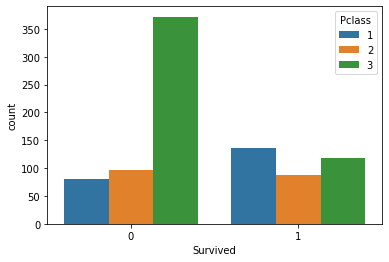

In [186]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

#### Checking classwise survivors

In [187]:
class1=train_data.loc[train_data.Pclass==1]['Survived']
rate_class1=sum(class1)/len(class1) * 100
print(' % of class1 survivers : ', rate_class1)

 % of class1 survivers :  62.96296296296296


In [188]:
class2=train_data.loc[train_data.Pclass==2]['Survived']
rate_class2=sum(class2)/len(class2) * 100
print(' % of class2 survivers : ', rate_class2)

 % of class2 survivers :  47.28260869565217


In [189]:
class3=train_data.loc[train_data.Pclass==3]['Survived']
rate_class3=sum(class3)/len(class3) * 100
print(' % of class3 survivers : ', rate_class3)

 % of class3 survivers :  24.236252545824847


<AxesSubplot:xlabel='Survived', ylabel='count'>

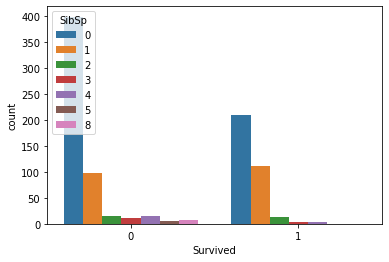

In [190]:
sns.countplot(x='Survived',hue='SibSp',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

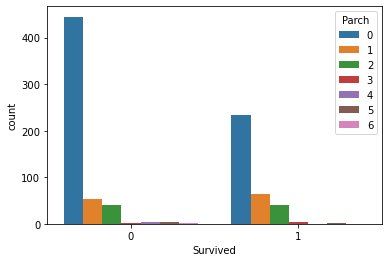

In [191]:
sns.countplot(x='Survived',hue='Parch',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

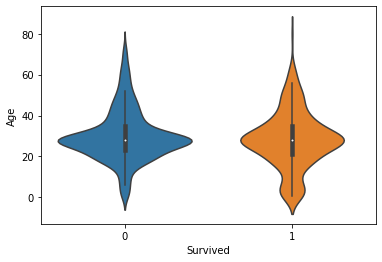

In [192]:
sns.violinplot(x='Survived',y='Age',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

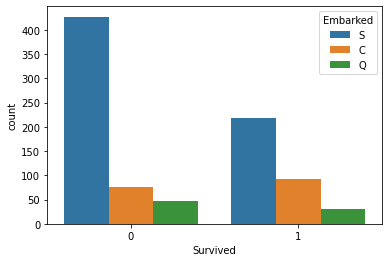

In [193]:
sns.countplot(x='Survived',hue='Embarked',data=train_data)

### Feature Enginering

In [194]:
train_data['Sex']=train_data['Sex'].map({'female' : 1,'male' : 0}).astype(int)
test_data['Sex']=test_data['Sex'].map({'female' : 1,'male' : 0}).astype(int)

In [195]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [196]:
emb_dummy = pd.get_dummies(train_data['Embarked'])
train_data=pd.concat([train_data,emb_dummy],axis=1)

In [197]:
emb_dummy2 = pd.get_dummies(test_data['Embarked'])
test_data=pd.concat([test_data,emb_dummy2],axis=1)

In [198]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [199]:
drop_cols=['Name','Ticket','Fare','Embarked']
train_data=train_data.drop(drop_cols,axis=1)
train_data=train_data.drop(['PassengerId'],axis=1)

In [200]:
test_data=test_data.drop(drop_cols,axis=1)

In [201]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,0,3,0,22.0,1,0,0,0,1
1,1,1,1,38.0,1,0,1,0,0
2,1,3,1,26.0,0,0,0,0,1
3,1,1,1,35.0,1,0,0,0,1
4,0,3,0,35.0,0,0,0,0,1


In [202]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,3,0,34.5,0,0,0,1,0
1,893,3,1,47.0,1,0,0,0,1
2,894,2,0,62.0,0,0,0,1,0
3,895,3,0,27.0,0,0,0,0,1
4,896,3,1,22.0,1,1,0,0,1


#### Asssigning ordinal values to age for both train and test data

In [203]:
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 36), 'Age'] = 1
train_data.loc[(train_data['Age'] > 36) & (train_data['Age'] <= 50), 'Age'] = 2
train_data.loc[(train_data['Age'] > 50) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4

In [204]:
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 36), 'Age'] = 1
test_data.loc[(test_data['Age'] > 36) & (test_data['Age'] <= 50), 'Age'] = 2
test_data.loc[(test_data['Age'] > 50) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4

In [205]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,0,3,0,1.0,1,0,0,0,1
1,1,1,1,2.0,1,0,1,0,0
2,1,3,1,1.0,0,0,0,0,1
3,1,1,1,1.0,1,0,0,0,1
4,0,3,0,1.0,0,0,0,0,1


In [206]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,3,0,1.0,0,0,0,1,0
1,893,3,1,2.0,1,0,0,0,1
2,894,2,0,3.0,0,0,0,1,0
3,895,3,0,1.0,0,0,0,0,1
4,896,3,1,1.0,1,1,0,0,1


#### Allocating X input and target values

In [207]:
X_train=train_data.drop(['Survived'],axis=1).values
Y_train=train_data['Survived'].values

In [208]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

#### Logistic Regression Model

In [209]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [210]:
y_pred=regressor.predict(x_test)

In [211]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
acc

0.7982062780269058

In [212]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[115,  22],
       [ 23,  63]], dtype=int64)

#### CART Model

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [214]:
y_pred1=dt.predict(x_test)

In [215]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc2=accuracy_score(y_test,y_pred1)
acc2

0.8116591928251121

#### RandomForest Model

In [216]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(max_depth=9, random_state=0)
rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [217]:
y_pred2=rc.predict(x_test)

In [218]:
acc3=accuracy_score(y_test,y_pred2)
acc3

0.8071748878923767

#### Preciting with RandomForrestModel

In [219]:
rc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [220]:
test=test_data.drop(['PassengerId'],axis=1)

In [221]:
final_pred=rc.predict(test)

In [222]:
test_data['Survived'] = final_pred
test_data.drop(['Pclass','Age','Sex','SibSp','Parch','C','Q','S'],inplace=True,axis=1)

In [223]:
test_data.to_csv('Submission.csv', index = False)